In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns  # for nicer plots
sns.set(style="darkgrid")  # default style
import tensorflow as tf
from tensorflow import keras
from keras import metrics
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models, Input
from tensorflow.keras.applications import DenseNet121
tf.get_logger().setLevel('INFO')
from sklearn.decomposition import PCA
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
import zipfile
import os
from PIL import Image
import sys
from tqdm import tqdm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras import layers, Model, Input
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    classification_report
)

In [2]:
# from tensorflow.keras import mixed_precision
# mixed_precision.set_global_policy('mixed_float16')

In [3]:
embedded_images = pd.read_csv("/Users/katya/Desktop/berkeley/Berkeley_core/207/ML Class/final_project/rxrx2/embeddings.csv")
metadata = pd.read_csv("/Users/katya/Desktop/berkeley/Berkeley_core/207/ML Class/final_project/metadata.csv")

In [4]:
embedded_images.head(20)

,site_id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_118,feature_119,feature_120,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127
0,HUVEC-1_1_AA03_1,-0.316918,-0.680636,0.808178,-0.137503,-0.947040,-2.796024,-1.386294,-2.541984,-0.036722,...,0.044025,0.136659,-2.087172,2.860377,0.231014,0.338580,-0.504502,-1.992612,-1.328181,0.587981
1,HUVEC-1_1_AA03_2,0.914670,-0.009687,1.157437,0.448207,-0.546811,-1.792279,-1.283470,-1.500057,0.508764,...,0.508053,0.828908,-2.586799,1.503782,-0.482412,0.894832,-1.406880,-1.567457,-1.237937,0.967158
2,HUVEC-1_1_AA03_3,0.384831,-0.630163,0.844492,0.078680,-1.497208,-3.127449,-0.617015,-1.984535,-0.062243,...,-1.566359,0.798682,-2.241158,2.297683,0.340067,-0.032073,-0.765850,-1.615617,-2.184443,0.673777
3,HUVEC-1_1_AA03_4,0.733473,-0.329016,1.319193,0.433355,-0.801268,-2.489902,-0.668106,-1.722575,-0.463873,...,-0.313790,0.446107,-2.883605,1.824921,-0.252444,-0.125901,-1.181341,-1.027408,-1.475612,0.640989
4,HUVEC-1_1_AA04_1,0.512833,0.402055,1.318915,-1.067507,-2.031572,-1.260452,-1.287148,-2.538712,-0.367633,...,-0.584362,-0.101393,-2.937795,2.197699,-0.537146,0.019088,-0.495586,-1.710877,-2.491404,0.924014
5,HUVEC-1_1_AA04_2,0.685602,-0.449330,-0.036173,0.566339,-1.345518,-2.758372,0.337740,-2.069584,-0.405746,...,-0.632067,0.844820,-3.025629,2.695810,0.306507,-0.764635,-0.768099,-1.869005,-1.870727,1.021658
6,HUVEC-1_1_AA04_3,0.727056,-0.127391,0.075612,-0.208260,-1.547239,-2.798045,-1.160213,-2.140850,-0.030790,...,-1.631549,0.545518,-2.310471,2.565591,-0.273869,0.521701,-0.443988,-1.436595,-1.964662,0.735162
7,HUVEC-1_1_AA04_4,1.014329,0.110145,1.379816,0.155982,-1.694931,-2.207772,-0.440026,-1.718514,-0.050229,...,-0.884933,0.409745,-3.268776,2.491673,-0.278280,0.139286,-1.183563,-1.582847,-1.861125,0.990245
8,HUVEC-1_1_AA05_1,0.350081,-0.069644,0.218782,-0.506698,-1.748009,-1.350738,-0.981009,-2.737542,-0.240257,...,-1.067775,0.014349,-2.353183,2.771362,-0.012947,0.152623,-0.297514,-1.015742,-2.478446,0.722264
9,HUVEC-1_1_AA05_2,0.564962,-0.211768,0.482409,0.357695,-1.255980,-2.357686,-0.943967,-2.373645,-0.275689,...,-1.354843,0.389791,-3.352989,2.610169,0.088752,-0.177975,-1.095216,-1.632764,-2.196692,0.764327


In [5]:
print(metadata.columns)
metadata.head()

Index(['site_id', 'well_id', 'cell_type', 'experiment', 'plate', 'well',
       'site', 'treatment', 'treatment_conc'],
      dtype='object')


,site_id,well_id,cell_type,experiment,plate,well,site,treatment,treatment_conc
0,HUVEC-1_1_AA03_1,HUVEC-1_1_AA03,HUVEC,HUVEC-1,1,AA03,1,Sonic-Hedgehog,0.1
1,HUVEC-1_1_AA03_2,HUVEC-1_1_AA03,HUVEC,HUVEC-1,1,AA03,2,Sonic-Hedgehog,0.1
2,HUVEC-1_1_AA03_3,HUVEC-1_1_AA03,HUVEC,HUVEC-1,1,AA03,3,Sonic-Hedgehog,0.1
3,HUVEC-1_1_AA03_4,HUVEC-1_1_AA03,HUVEC,HUVEC-1,1,AA03,4,Sonic-Hedgehog,0.1
4,HUVEC-1_1_AA04_1,HUVEC-1_1_AA04,HUVEC,HUVEC-1,1,AA04,1,GDF-1,0.1


In [6]:
metadata['well_id'].unique()

array(['HUVEC-1_1_AA03', 'HUVEC-1_1_AA04', 'HUVEC-1_1_AA05', ...,
       'HUVEC-2_12_Z45', 'HUVEC-2_12_Z46', 'HUVEC-2_12_Z47'], dtype=object)

In [7]:
#had to convert them both to string
embedded_images["site_id"] = embedded_images["site_id"].astype(str)
metadata["site_id"] = metadata["site_id"].astype(str)

metadata.head()


,site_id,well_id,cell_type,experiment,plate,well,site,treatment,treatment_conc
0,HUVEC-1_1_AA03_1,HUVEC-1_1_AA03,HUVEC,HUVEC-1,1,AA03,1,Sonic-Hedgehog,0.1
1,HUVEC-1_1_AA03_2,HUVEC-1_1_AA03,HUVEC,HUVEC-1,1,AA03,2,Sonic-Hedgehog,0.1
2,HUVEC-1_1_AA03_3,HUVEC-1_1_AA03,HUVEC,HUVEC-1,1,AA03,3,Sonic-Hedgehog,0.1
3,HUVEC-1_1_AA03_4,HUVEC-1_1_AA03,HUVEC,HUVEC-1,1,AA03,4,Sonic-Hedgehog,0.1
4,HUVEC-1_1_AA04_1,HUVEC-1_1_AA04,HUVEC,HUVEC-1,1,AA04,1,GDF-1,0.1


Mapping the immune modulators becasue that is what we care about

In [8]:
# Define treatment categories mapping
# Define treatment categories and subcategories
immune_modulators = {

    "Interferons": [
        "IFN-alpha-A", "IFNB-1", "IFN-gamma", "IFN-omega"
    ]
}

# Create a lookup dictionary for fast mapping
immune_treatment_to_category = {}
for subcategory, treatments in immune_modulators.items():
    for treatment in treatments:
        immune_treatment_to_category[treatment] = ("Immune System Modulators", subcategory)

# Function to assign category and subcategory
def categorize_treatment(treatment):
    if treatment == "EMPTY":
        return "Control", "Control"  # Control case
    return immune_treatment_to_category.get(treatment, ("N/A", "N/A"))  # Assign category if found, else N/A

# Apply the categorization to the dataframe
metadata[["treatment_category", "treatment_subcategory"]] = metadata["treatment"].apply(lambda x: pd.Series(categorize_treatment(x)))



In [9]:
#remove the NA rows
immune_df = metadata[metadata["treatment_category"] != "N/A"]

In [10]:
#rename beta column 
immune_df["treatment"] = immune_df["treatment"].replace("IFNB-1", "IFN-beta")

/var/folders/_b/34s_2v9n7wn21qv0s9jqh5gr0000gn/T/ipykernel_4012/3255148715.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  immune_df["treatment"] = immune_df["treatment"].replace("IFNB-1", "IFN-beta")


In [11]:
immune_df['treatment_subcategory'].value_counts()

treatment_subcategory
Control        7579
Interferons    1150
Name: count, dtype: int64

In [12]:
immune_df['treatment'].value_counts()

treatment
EMPTY          7579
IFN-omega       288
IFN-alpha-A     288
IFN-gamma       287
IFN-beta        287
Name: count, dtype: int64

In [13]:

# Define the base directory
base_dir = "/Users/katya/Desktop/berkeley/Berkeley_core/207/ML Class/final_project/rxrx2-images/rxrx2/images"

# Define function to construct image paths
def construct_image_paths(row):
    huvec = row["experiment"]  # Extracting HUVEC-1 or HUVEC-2
    plate = f"Plate{row['plate']}"  # Converting plate number to 'PlateX'
    well_site = row["well"] # Extract AA03 from well_id
    site = row["site"]  # Site number
    
    # Construct file paths for each stain
    stains = ["Hoechst", "ConA", "Phalloidin", "Syto14", "MitoTracker", "WGA"]
    file_paths = {
        stain: os.path.join(base_dir, huvec, plate, f"{well_site}_s{site}_w{idx+1}.png")
        for idx, stain in enumerate(stains)
    }
    
    return file_paths

# Apply function to each row and create new columns for each stain
image_paths = immune_df.apply(construct_image_paths, axis=1)
image_df = pd.DataFrame(image_paths.tolist())  # Convert dictionary to DataFrame
immune_df_v3 = pd.concat([immune_df.reset_index(drop=True), 
                          image_df.reset_index(drop=True)], axis=1)


In [14]:
immune_df_v3 = pd.concat([immune_df.reset_index(drop=True), 
                          image_df.reset_index(drop=True)], axis=1)

print(immune_df_v3.shape)  # Should be (19656, 17)

(8729, 17)


In [15]:
immune_df_v3.head(150)

,site_id,well_id,cell_type,experiment,plate,well,site,treatment,treatment_conc,treatment_category,treatment_subcategory,Hoechst,ConA,Phalloidin,Syto14,MitoTracker,WGA
0,HUVEC-1_1_AA35_1,HUVEC-1_1_AA35,HUVEC,HUVEC-1,1,AA35,1,EMPTY,NaN,Control,Control,/Users/katya/Desktop/berkeley/Berkeley_core/20...,/Users/katya/Desktop/berkeley/Berkeley_core/20...,/Users/katya/Desktop/berkeley/Berkeley_core/20...,/Users/katya/Desktop/berkeley/Berkeley_core/20...,/Users/katya/Desktop/berkeley/Berkeley_core/20...,/Users/katya/Desktop/berkeley/Berkeley_core/20...
1,HUVEC-1_1_AA35_2,HUVEC-1_1_AA35,HUVEC,HUVEC-1,1,AA35,2,EMPTY,NaN,Control,Control,/Users/katya/Desktop/berkeley/Berkeley_core/20...,/Users/katya/Desktop/berkeley/Berkeley_core/20...,/Users/katya/Desktop/berkeley/Berkeley_core/20...,/Users/katya/Desktop/berkeley/Berkeley_core/20...,/Users/katya/Desktop/berkeley/Berkeley_core/20...,/Users/katya/Desktop/berkeley/Berkeley_core/20...
2,HUVEC-1_1_AA35_3,HUVEC-1_1_AA35,HUVEC,HUVEC-1,1,AA35,3,EMPTY,NaN,Control,Control,/Users/katya/Desktop/berkeley/Berkeley_core/20...,/Users/katya/Desktop/berkeley/Berkeley_core/20...,/Users/katya/Desktop/berkeley/Berkeley_core/20...,/Users/katya/Desktop/berkeley/Berkeley_core/20...,/Users/katya/Desktop/berkeley/Berkeley_core/20...,/Users/katya/Desktop/berkeley/Berkeley_core/20...
3,HUVEC-1_1_AA35_4,HUVEC-1_1_AA35,HUVEC,HUVEC-1,1,AA35,4,EMPTY,NaN,Control,Control,/Users/katya/Desktop/berkeley/Berkeley_core/20...,/Users/katya/Desktop/berkeley/Berkeley_core/20...,/Users/katya/Desktop/berkeley/Berkeley_core/20...,/Users/katya/Desktop/berkeley/Berkeley_core/20...,/Users/katya/Desktop/berkeley/Berkeley_core/20...,/Users/katya/Desktop/berkeley/Berkeley_core/20...
4,HUVEC-1_1_AA42_1,HUVEC-1_1_AA42,HUVEC,HUVEC-1,1,AA42,1,EMPTY,NaN,Control,Control,/Users/katya/Desktop/berkeley/Berkeley_core/20...,/Users/katya/Desktop/berkeley/Berkeley_core/20...,/Users/katya/Desktop/berkeley/Berkeley_core/20...,/Users/katya/Desktop/berkeley/Berkeley_core/20...,/Users/katya/Desktop/berkeley/Berkeley_core/20...,/Users/katya/Desktop/berkeley/Berkeley_core/20...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,HUVEC-1_1_K35_2,HUVEC-1_1_K35,HUVEC,HUVEC-1,1,K35,2,IFN-alpha-A,0.1,Immune System Modulators,Interferons,/Users/katya/Desktop/berkeley/Berkeley_core/20...,/Users/katya/Desktop/berkeley/Berkeley_core/20...,/Users/katya/Desktop/berkeley/Berkeley_core/20...,/Users/katya/Desktop/berkeley/Berkeley_core/20...,/Users/katya/Desktop/berkeley/Berkeley_core/20...,/Users/katya/Desktop/berkeley/Berkeley_core/20...
146,HUVEC-1_1_K35_3,HUVEC-1_1_K35,HUVEC,HUVEC-1,1,K35,3,IFN-alpha-A,0.1,Immune System Modulators,Interferons,/Users/katya/Desktop/berkeley/Berkeley_core/20...,/Users/katya/Desktop/berkeley/Berkeley_core/20...,/Users/katya/Desktop/berkeley/Berkeley_core/20...,/Users/katya/Desktop/berkeley/Berkeley_core/20...,/Users/katya/Desktop/berkeley/Berkeley_core/20...,/Users/katya/Desktop/berkeley/Berkeley_core/20...
147,HUVEC-1_1_K35_4,HUVEC-1_1_K35,HUVEC,HUVEC-1,1,K35,4,IFN-alpha-A,0.1,Immune System Modulators,Interferons,/Users/katya/Desktop/berkeley/Berkeley_core/20...,/Users/katya/Desktop/berkeley/Berkeley_core/20...,/Users/katya/Desktop/berkeley/Berkeley_core/20...,/Users/katya/Desktop/berkeley/Berkeley_core/20...,/Users/katya/Desktop/berkeley/Berkeley_core/20...,/Users/katya/Desktop/berkeley/Berkeley_core/20...
148,HUVEC-1_1_L25_1,HUVEC-1_1_L25,HUVEC,HUVEC-1,1,L25,1,EMPTY,NaN,Control,Control,/Users/katya/Desktop/berkeley/Berkeley_core/20...,/Users/katya/Desktop/berkeley/Berkeley_core/20...,/Users/katya/Desktop/berkeley/Berkeley_core/20...,/Users/katya/Desktop/berkeley/Berkeley_core/20...,/Users/katya/Desktop/berkeley/Berkeley_core/20...,/Users/katya/Desktop/berkeley/Berkeley_core/20...


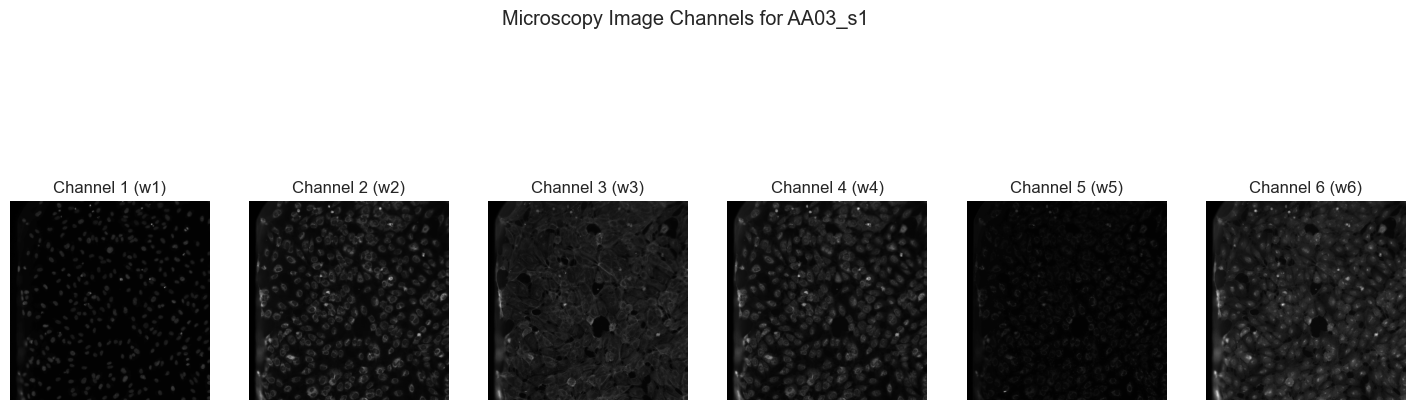

In [16]:
# Define base path
base_path = "/Users/katya/Desktop/berkeley/Berkeley_core/207/ML Class/final_project/rxrx2-images/rxrx2/images"

# Define the specific experiment, plate, and well-site to load
experiment = "HUVEC-1"
plate = "Plate1"
well = "AA03"
site = "s1"

# Load all 6 channels (w1 to w6)
channels = ["w1", "w2", "w3", "w4", "w5", "w6"]
image_paths = [os.path.join(base_path, experiment, plate, f"{well}_{site}_{w}.png") for w in channels]

# Load images using PIL
images = [Image.open(img_path) for img_path in image_paths]

# Plot the images
fig, axes = plt.subplots(1, 6, figsize=(18, 6))
for i, ax in enumerate(axes):
    ax.imshow(images[i], cmap="gray")
    ax.set_title(f"Channel {i+1} ({channels[i]})")
    ax.axis("off")

plt.suptitle(f"Microscopy Image Channels for {well}_{site}")
plt.show()

To make thing faster save the files locally RUN ONLY ONCE

In [17]:
# save_dir = "/Users/katya/Desktop/berkeley/Berkeley_core/preprocessed_npy"
# os.makedirs(save_dir, exist_ok=True)

In [18]:

# def preprocess_and_save_images(df, image_columns, save_dir, size=(224, 224)):
#     """
#     Converts and saves all 6-channel images to .npy files
#     """
#     #creates the output directory if it doesn't exist
#     os.makedirs(save_dir, exist_ok=True)
#     # initialize a list to store the file paths 
#     file_paths = []
# 
#     #loop through each row of the DataFrame, tqdm shows a progress bar
#     for idx, row in tqdm(df.iterrows(), total=len(df)):
#         # Load the 6-channel image 
#         #try block to catch any errors
#         try:
#             img_stack = []
#             #loop through each stain
#             for col in image_columns:
#                 #open image from the path in the cell and resize
#                 img = Image.open(row[col]).resize(size)
#                 #then normalize 
#                 img_array = np.array(img).astype("float32") / 255.0
#                 #append to list
#                 img_stack.append(img_array)
#             #stack the 6 grayscale images into a single array
#             stacked = np.stack(img_stack, axis=-1)
# 
#             # Define a unique filename using site_id or similar
#             site_id = row["site_id"]
#             #save the stack
#             out_path = os.path.join(save_dir, f"{site_id}.npy")
#             np.save(out_path, stacked)
#             file_paths.append(out_path)
#         except Exception as e:
#             print(f"Failed on row {idx}: {e}")
# 
#     return file_paths

In [19]:
# # the stains
# image_columns = ["Hoechst", "ConA", "Phalloidin", "Syto14", "MitoTracker", "WGA"]
# #run the function
# preprocessed_paths = preprocess_and_save_images(immune_df_v3, image_columns, save_dir)


In [20]:
# Downsample so that control has same amount 
immune_df_balanced = (
    immune_df_v3
    .groupby("treatment", group_keys=False)
    .apply(lambda x: x.sample(min(len(x), 287), random_state=42))
    .reset_index(drop=True)
)

#only going to do Interferons
target_treatment = "IFN-alpha-A"
binary_df = immune_df_balanced[
    (immune_df_balanced["treatment"] == target_treatment) |
    (immune_df_balanced["treatment"] == "EMPTY")
].copy()

binary_df["label"] = (binary_df["treatment"] == target_treatment).astype(int)



/var/folders/_b/34s_2v9n7wn21qv0s9jqh5gr0000gn/T/ipykernel_4012/2363618773.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(min(len(x), 287), random_state=42))


In [21]:
binary_df.head(150)

,site_id,well_id,cell_type,experiment,plate,well,site,treatment,treatment_conc,treatment_category,treatment_subcategory,Hoechst,ConA,Phalloidin,Syto14,MitoTracker,WGA,label
0,HUVEC-1_3_G12_3,HUVEC-1_3_G12,HUVEC,HUVEC-1,3,G12,3,EMPTY,NaN,Control,Control,/Users/katya/Desktop/berkeley/Berkeley_core/20...,/Users/katya/Desktop/berkeley/Berkeley_core/20...,/Users/katya/Desktop/berkeley/Berkeley_core/20...,/Users/katya/Desktop/berkeley/Berkeley_core/20...,/Users/katya/Desktop/berkeley/Berkeley_core/20...,/Users/katya/Desktop/berkeley/Berkeley_core/20...,0
1,HUVEC-1_2_Z41_4,HUVEC-1_2_Z41,HUVEC,HUVEC-1,2,Z41,4,EMPTY,NaN,Control,Control,/Users/katya/Desktop/berkeley/Berkeley_core/20...,/Users/katya/Desktop/berkeley/Berkeley_core/20...,/Users/katya/Desktop/berkeley/Berkeley_core/20...,/Users/katya/Desktop/berkeley/Berkeley_core/20...,/Users/katya/Desktop/berkeley/Berkeley_core/20...,/Users/katya/Desktop/berkeley/Berkeley_core/20...,0
2,HUVEC-1_3_R44_1,HUVEC-1_3_R44,HUVEC,HUVEC-1,3,R44,1,EMPTY,NaN,Control,Control,/Users/katya/Desktop/berkeley/Berkeley_core/20...,/Users/katya/Desktop/berkeley/Berkeley_core/20...,/Users/katya/Desktop/berkeley/Berkeley_core/20...,/Users/katya/Desktop/berkeley/Berkeley_core/20...,/Users/katya/Desktop/berkeley/Berkeley_core/20...,/Users/katya/Desktop/berkeley/Berkeley_core/20...,0
3,HUVEC-2_2_R03_1,HUVEC-2_2_R03,HUVEC,HUVEC-2,2,R03,1,EMPTY,NaN,Control,Control,/Users/katya/Desktop/berkeley/Berkeley_core/20...,/Users/katya/Desktop/berkeley/Berkeley_core/20...,/Users/katya/Desktop/berkeley/Berkeley_core/20...,/Users/katya/Desktop/berkeley/Berkeley_core/20...,/Users/katya/Desktop/berkeley/Berkeley_core/20...,/Users/katya/Desktop/berkeley/Berkeley_core/20...,0
4,HUVEC-2_11_H20_2,HUVEC-2_11_H20,HUVEC,HUVEC-2,11,H20,2,EMPTY,NaN,Control,Control,/Users/katya/Desktop/berkeley/Berkeley_core/20...,/Users/katya/Desktop/berkeley/Berkeley_core/20...,/Users/katya/Desktop/berkeley/Berkeley_core/20...,/Users/katya/Desktop/berkeley/Berkeley_core/20...,/Users/katya/Desktop/berkeley/Berkeley_core/20...,/Users/katya/Desktop/berkeley/Berkeley_core/20...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,HUVEC-2_3_S37_1,HUVEC-2_3_S37,HUVEC,HUVEC-2,3,S37,1,EMPTY,NaN,Control,Control,/Users/katya/Desktop/berkeley/Berkeley_core/20...,/Users/katya/Desktop/berkeley/Berkeley_core/20...,/Users/katya/Desktop/berkeley/Berkeley_core/20...,/Users/katya/Desktop/berkeley/Berkeley_core/20...,/Users/katya/Desktop/berkeley/Berkeley_core/20...,/Users/katya/Desktop/berkeley/Berkeley_core/20...,0
146,HUVEC-2_3_S06_1,HUVEC-2_3_S06,HUVEC,HUVEC-2,3,S06,1,EMPTY,NaN,Control,Control,/Users/katya/Desktop/berkeley/Berkeley_core/20...,/Users/katya/Desktop/berkeley/Berkeley_core/20...,/Users/katya/Desktop/berkeley/Berkeley_core/20...,/Users/katya/Desktop/berkeley/Berkeley_core/20...,/Users/katya/Desktop/berkeley/Berkeley_core/20...,/Users/katya/Desktop/berkeley/Berkeley_core/20...,0
147,HUVEC-1_3_O05_1,HUVEC-1_3_O05,HUVEC,HUVEC-1,3,O05,1,EMPTY,NaN,Control,Control,/Users/katya/Desktop/berkeley/Berkeley_core/20...,/Users/katya/Desktop/berkeley/Berkeley_core/20...,/Users/katya/Desktop/berkeley/Berkeley_core/20...,/Users/katya/Desktop/berkeley/Berkeley_core/20...,/Users/katya/Desktop/berkeley/Berkeley_core/20...,/Users/katya/Desktop/berkeley/Berkeley_core/20...,0
148,HUVEC-2_8_AC33_3,HUVEC-2_8_AC33,HUVEC,HUVEC-2,8,AC33,3,EMPTY,NaN,Control,Control,/Users/katya/Desktop/berkeley/Berkeley_core/20...,/Users/katya/Desktop/berkeley/Berkeley_core/20...,/Users/katya/Desktop/berkeley/Berkeley_core/20...,/Users/katya/Desktop/berkeley/Berkeley_core/20...,/Users/katya/Desktop/berkeley/Berkeley_core/20...,/Users/katya/Desktop/berkeley/Berkeley_core/20...,0


In [22]:
binary_df['label'].value_counts()

label
0    287
1    287
Name: count, dtype: int64

In [23]:
binary_df.shape

(574, 18)

In [24]:
#if running this after you've already moved change this to the directory with images
correct_dir = "/Users/katya/Desktop/berkeley/Berkeley_core/preprocessed_npy"

binary_df["npy_path"] = binary_df["site_id"].apply(lambda x: os.path.join(correct_dir, f"{x}.npy"))


In [25]:
from pathlib import Path
binary_df["npy_path"].apply(lambda x: Path(x).exists()).value_counts()


npy_path
True    574
Name: count, dtype: int64

In [26]:
train_df, temp_df = train_test_split(
    binary_df, test_size=0.4, stratify=binary_df["label"], random_state=42
)
val_df, test_df = train_test_split(
    temp_df, test_size=0.5, stratify=temp_df["label"], random_state=42
)


changing strategy to doing control versus 1 category

# Contrastive Learning

This class defines a custom dataset load that helps me stream the npy images with shape (224,224,6) 

In [27]:
#Cell 1
# Define a custom image-loading utility class for the RxRx images saved as preprocessed 6-channel .npy files

class ImageDataset:
    """
    This class takes in the immune_df which holds 1 row per well/site,
    with a column called 'npy_path' pointing to a preprocessed (224x224x6) .npy file.
    These were created ahead of time for fast loading and bypass the need to read/rescale each TIFF manually.
    """
    def __init__(self, dataframe, npy_column="npy_path"):
        self.df = dataframe
        self.npy_column = npy_column

    def load_images(self, row):
        """
        Load a preprocessed (224, 224, 6) image tensor from a .npy file.
        The array is already float32 and normalized to [0, 1].
        """
        image = np.load(row[self.npy_column]).astype(np.float32)
        return image

    def generator(self):
        """
        Generate one image at a time on demand so we don't load all images into memory.
        This pipeline loads one .npy → processes (if needed) → yields it.
        """
        for _, row in self.df.iterrows():
            yield self.load_images(row)


Making an Augmentation Function, this will generate two different augmented views on the same image this is a core idea of SimCLr which takes an image, generates two different versions of it using augmentations, and treat those two as a positive pair -- i.e. that they should produce similar embeddings, without augmentatino the model would just learn to memorize pixel values

In [28]:
#Cell 2 Augmentation

def simclr_augment(image):
    # Convert to TensorFlow tensor if needed
    if isinstance(image, np.ndarray):
        image = tf.convert_to_tensor(image)
        
    #brighten all images first
    image = image * 1.75
    image = tf.clip_by_value(image, 0.0, 1.0)

    # Random flip
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)

    # Random crop + resize
    image = tf.image.resize_with_crop_or_pad(image, 256, 256)
    image = tf.image.random_crop(image, size=[224, 224, 6])

    # Brightness and contrast
    image = tf.image.random_brightness(image, max_delta=0.2)
    image = tf.image.random_contrast(image, lower=0.8, upper=1.2)

    # Gaussian noise (simulates camera/staining variation)
    noise = tf.random.normal(shape=tf.shape(image), mean=0.0, stddev=0.03, dtype=tf.float32)
    image = image + noise
    image = tf.clip_by_value(image, 0.0, 1.0)  # keep it normalized
    
    image = tf.ensure_shape(image, [224, 224, 6])
    return image


Here creating the core data pieplie - turning a datafram of .npy paths into batched stream of paired, augmented views of each image

In [29]:
# Cell 3 Builds Training Dataset using .npy-based ImageDataset

def create_simclr_dataset(df, batch_size=32):
    # loading the images one at a time from preprocessed .npy files
    base_dataset = ImageDataset(df)  # now uses the 'npy_path' column by default
    
    def generator():
        # generate two differently augmented versions of the same image
        for img in base_dataset.generator():
            yield simclr_augment(img), simclr_augment(img)
    #tells tf the shape and type of each output
    output_signature = (
        tf.TensorSpec(shape=(224, 224, 6), dtype=tf.float32),
        tf.TensorSpec(shape=(224, 224, 6), dtype=tf.float32),
    )

    dataset = tf.data.Dataset.from_generator(generator, output_signature=output_signature)
    # randomize sample order
    dataset = dataset.shuffle(512)
    # group samples, and load data in background while training runs
    dataset = dataset.batch(batch_size).cache().prefetch(tf.data.AUTOTUNE)
    # return ready-to-train SimCLR dataset
    return dataset


In [30]:
# Cell 5 instantiating the final tf datasets for training, val and testing

train_dataset = create_simclr_dataset(train_df)
val_dataset = create_simclr_dataset(val_df)
test_dataset = create_simclr_dataset(test_df)


2025-04-17 14:46:09.973571: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Max
2025-04-17 14:46:09.973594: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 64.00 GB
2025-04-17 14:46:09.973597: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 24.00 GB
2025-04-17 14:46:09.973612: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-04-17 14:46:09.973621: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


2025-04-17 14:46:15.776598: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


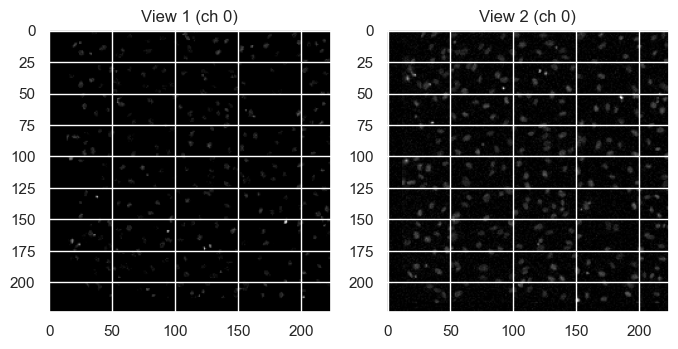

In [31]:
#check datsets
for view1, view2 in train_dataset.take(1):
    # Show the first image in the batch, channel 0 only for now
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))
    axes[0].imshow(view1[0, :, :, 0], cmap='gray')
    axes[0].set_title("View 1 (ch 0)")
    axes[1].imshow(view2[0, :, :, 0], cmap='gray')
    axes[1].set_title("View 2 (ch 0)")
    plt.show()
    break

Setting up the SimClr encoder backbone using DenseNEt and adapting the 6-channel microscopy images to 3 channel

Conv2d (16, 3x3): extracts low-level features from 6 channels
Con2D (3, 1x1): compress down to 3 channel pseudo rgb
activation='linear': keep output values unbounded before feeding into DenseNet

The above let my model learn how to fuse stain channels into a 3-channel image 

In [32]:
# Cell 6: Building Keras Model

# Input 6-channel image
input_layer = Input(shape=(224, 224, 6), name="6_channel_input")

# Project 6 → 3 channels to match DenseNet expectations
projected = layers.Conv2D(16, (3, 3), padding='same', activation='relu')(input_layer)
projected = layers.Conv2D(3, (1, 1), padding='same', activation='linear')(projected)

# Load DenseNet121 (pretrained), without the top classification layer
base_model = DenseNet121(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)

# make base model trainable (fine-tuning)
for layer in base_model.layers:
    layer.trainable = True

# Get feature map output from base model
features = base_model(projected)  # shape: (None, 7, 7, 1024)
features = layers.Activation('relu', name="last_conv")(features)  #for Grad-CAM later



At this stage I'm saying take everything from the input_layer (6-channel image) pass it through the Denseet and projection layers, and output a 128 dimensional feature vector. Wrap this whole thing into a single model object

In [33]:
#Cell 8 Creates full Keras model

# ---- SimCLR projection head ----
# Input: features from last conv layer (from Cell 6)
simclr_x = layers.GlobalAveragePooling2D()(features)
simclr_x = layers.BatchNormalization()(simclr_x)
simclr_x = layers.Dense(512, activation='relu')(simclr_x)
simclr_x = layers.BatchNormalization()(simclr_x)
simclr_x = layers.Dropout(0.3)(simclr_x)

simclr_x = layers.Dense(256, activation='relu')(simclr_x)
simclr_x = layers.BatchNormalization()(simclr_x)
simclr_x = layers.Dropout(0.3)(simclr_x)

projection = layers.Dense(128, activation=None, name="projection")(simclr_x)

# Final SimCLR model
simclr_model = models.Model(inputs=input_layer, outputs=projection, name="SimCLRModel")

# ---- Classifier head ----
# Reuse the same 'features' tensor (spatial 7x7 map)
x = layers.GlobalAveragePooling2D()(features)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dropout(0.3)(x)

output = layers.Dense(1, activation='sigmoid')(x)

# Final classifier model (for fine-tuning & Grad-CAM)
classifier_model = models.Model(inputs=input_layer, outputs=output, name="ClassifierModel")


Using NT-Xent loss (Normalized Temperature-scale Cross Entropy Loss) which was recommended for SimCLR

In [34]:
#Cell 9 Setting up the Softmax Loss

def nt_xent_loss(z_i, z_j, temperature=0.5):
    """
    z_i and z_j are the two augmented views of the batch.
    temperature: contrastive learning, is a scalar hyperparameter 
        small values (0.1) makes softmax sharper focus on top matches only
        large values (1.0) makes soft max smoother, allows broader similarity
        Set ot 0.5 based on the paper the dataset comes from 
    Shape: (batch_size, projection_dim)
    """
    batch_size = tf.shape(z_i)[0]
    z_i = tf.math.l2_normalize(z_i, axis=1)
    z_j = tf.math.l2_normalize(z_j, axis=1)

    # Concatenate for (2N, D)
    z = tf.concat([z_i, z_j], axis=0)

    # Compute cosine similarity (2N, 2N)
    sim = tf.matmul(z, z, transpose_b=True) / temperature

    # Remove self-similarity from sim matrix (set diagonal to large negative)
    logits_mask = tf.linalg.diag(tf.ones(2 * batch_size))
    sim = sim - 1e9 * logits_mask  # effectively removes diagonal

    # Create positive pair similarity (numerator)
    positives = tf.concat([tf.range(batch_size, 2 * batch_size), tf.range(0, batch_size)], axis=0)

    # Cross-entropy loss (supervised) against positive indices
    labels = tf.cast(positives, tf.int32)
    loss = tf.keras.losses.sparse_categorical_crossentropy(labels, sim, from_logits=True)

    return tf.reduce_mean(loss)


In [35]:
#Cell 10 Training 

#define the optimizer 
optimizer = tf.keras.optimizers.Adam(1e-4)

def train_step(view1, view2):
    #record operations to automatically compute gradients
    with tf.GradientTape() as tape:
        # Forward pass to get the embeddings
        z_i = simclr_model(view1, training=True)
        z_j = simclr_model(view2, training=True)

        # Compute NT-Xent contrastive loss
        loss = nt_xent_loss(z_i, z_j)

    # Backprop
    gradients = tape.gradient(loss, simclr_model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, simclr_model.trainable_variables))
    return loss


In [36]:
#Cell 11 Run the model through training 

EPOCHS = 20
loss_history = []

for epoch in range(EPOCHS):
    print(f"starting epoch {epoch+1}/{EPOCHS}")
  

    total_loss = 0.0
    num_batches = 0

    for view1, view2 in train_dataset:
        loss = train_step(view1, view2)
        total_loss += float(loss)  # ensure it's a Python float
        num_batches += 1

    avg_loss = total_loss / num_batches
    loss_history.append(avg_loss)

    print(f"epoch {epoch+1} complete | Loss: {avg_loss:.4f}")




starting epoch 1/20


2025-04-17 14:47:15.363601: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


epoch 1 complete | Loss: 4.0696
starting epoch 2/20


2025-04-17 14:47:59.808236: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


epoch 2 complete | Loss: 3.9500
starting epoch 3/20


2025-04-17 14:48:45.086238: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


epoch 3 complete | Loss: 3.8156
starting epoch 4/20


2025-04-17 14:49:31.517411: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


epoch 4 complete | Loss: 3.7054
starting epoch 5/20


2025-04-17 14:50:18.478642: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


epoch 5 complete | Loss: 3.5736
starting epoch 6/20


2025-04-17 14:51:04.998348: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


epoch 6 complete | Loss: 3.4484
starting epoch 7/20


2025-04-17 14:51:51.418038: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


epoch 7 complete | Loss: 3.3572
starting epoch 8/20


2025-04-17 14:52:36.662042: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


epoch 8 complete | Loss: 3.3056
starting epoch 9/20


2025-04-17 14:53:22.248829: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


epoch 9 complete | Loss: 3.2156
starting epoch 10/20


2025-04-17 14:54:07.685659: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


epoch 10 complete | Loss: 3.1549
starting epoch 11/20


2025-04-17 14:54:52.358935: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


epoch 11 complete | Loss: 3.1168
starting epoch 12/20


2025-04-17 14:55:37.201253: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


epoch 12 complete | Loss: 3.0540
starting epoch 13/20


2025-04-17 14:56:22.281847: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


epoch 13 complete | Loss: 3.0109
starting epoch 14/20


2025-04-17 14:57:07.698314: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


epoch 14 complete | Loss: 2.9852
starting epoch 15/20


2025-04-17 14:57:53.038662: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


epoch 15 complete | Loss: 2.9490
starting epoch 16/20


2025-04-17 14:58:38.412110: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


epoch 16 complete | Loss: 2.9136
starting epoch 17/20


2025-04-17 14:59:23.009146: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


epoch 17 complete | Loss: 2.9003
starting epoch 18/20


2025-04-17 15:00:07.612035: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


epoch 18 complete | Loss: 2.8745
starting epoch 19/20


2025-04-17 15:00:52.015230: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


epoch 19 complete | Loss: 2.8419
starting epoch 20/20
epoch 20 complete | Loss: 2.8305


2025-04-17 15:01:36.944605: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


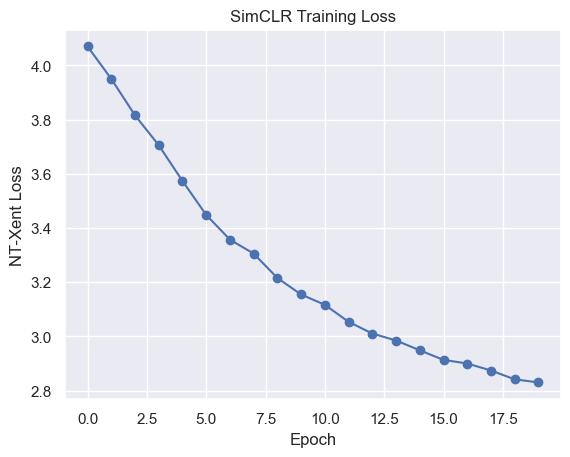

In [37]:
plt.plot(loss_history, marker='o')
plt.title("SimCLR Training Loss")
plt.xlabel("Epoch")
plt.ylabel("NT-Xent Loss")
plt.grid(True)
plt.show()


Freeze the model:


In [38]:
#cell 12: freeze teh encoder 
simclr_model.trainable = False


extract embeddings

In [39]:
#cell 13
#load ,npy images ad convert them to numpy array
def batch_generator(df, batch_size=32):
    for i in range(0, len(df), batch_size):
        batch_paths = df.iloc[i:i+batch_size]["npy_path"].values
        batch_images = [np.load(p).astype(np.float32) for p in batch_paths]
        yield np.stack(batch_images)

In [40]:
#cell 14: generate a numpy array of simclr mebeddings for validation set

#(n_val, 128)
val_embeddings = []
#val_labels
val_labels = []

for i, batch in enumerate(batch_generator(val_df, batch_size=32)):
    z = simclr_model(batch, training=False)  # inference mode
    val_embeddings.extend(z.numpy())
    print(f"Processed validation batch {i+1}")

val_labels = val_df["treatment"].tolist()

Processed validation batch 1
Processed validation batch 2
Processed validation batch 3
Processed validation batch 4


visualize embeddings

save embeddings

In [41]:
# val_embeddings = np.array(val_embeddings)  # shape (N, 128)
# val_labels = val_df["treatment"].tolist()  # or use "label" if binary
# site_ids = val_df["site_id"].tolist()      # optional but useful


In [42]:

# df_embed = pd.DataFrame(val_embeddings)
# df_embed["treatment"] = val_labels
# df_embed["site_id"] = site_ids  # optional, for traceability


In [43]:
 # df_embed.to_csv("ifn_beta_embeddings.csv", index=False)

In [44]:
#cell 15: generate a numpy array of simclr mebeddings for test set


test_embeddings = []
test_labels = []

for i, batch in enumerate(batch_generator(test_df, batch_size=32)):
    z = simclr_model(batch, training=False)
    test_embeddings.extend(z.numpy())
    print(f"Processed test batch {i+1}")

test_labels = test_df["treatment"].tolist()

Processed test batch 1
Processed test batch 2
Processed test batch 3
Processed test batch 4


In [45]:
#cell 16: generate a numpy array of simclr emebeddings for train set

train_embeddings = []
train_labels = []

for i, batch in enumerate(batch_generator(train_df, batch_size=32)):
    z = simclr_model(batch, training=False)
    train_embeddings.extend(z.numpy())
    print(f"Processed test batch {i+1}")

train_labels = train_df["treatment"].tolist()

Processed test batch 1
Processed test batch 2
Processed test batch 3
Processed test batch 4
Processed test batch 5
Processed test batch 6
Processed test batch 7
Processed test batch 8
Processed test batch 9
Processed test batch 10
Processed test batch 11


In [46]:
# cell 17: Train classifier on training embeddings
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(train_embeddings, train_labels)

# Validate
val_pred = clf.predict(val_embeddings)
val_acc = accuracy_score(val_labels, val_pred)
print("Validation accuracy:", val_acc)

# Test
test_pred = clf.predict(test_embeddings)
test_acc = accuracy_score(test_labels, test_pred)
print("Test accuracy:", test_acc)


Validation accuracy: 0.5217391304347826
Test accuracy: 0.5217391304347826


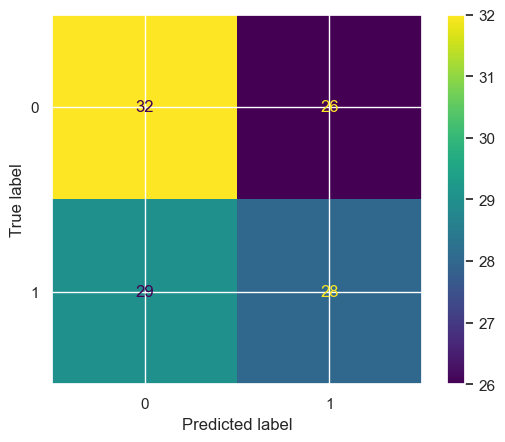

In [47]:

cm = confusion_matrix(test_labels, test_pred)
ConfusionMatrixDisplay(cm).plot()

In [48]:
# If 'IFN-alpha-A' is your positive class:
precision = precision_score(test_labels, test_pred, pos_label="IFN-alpha-A")
recall = recall_score(test_labels, test_pred, pos_label="IFN-alpha-A")
f1 = f1_score(test_labels, test_pred, pos_label="IFN-alpha-A")


In [49]:
print("Unique labels:", set(test_labels))

Unique labels: {'IFN-alpha-A', 'EMPTY'}


In [50]:

# Accuracy
accuracy = accuracy_score(test_labels, test_pred)

# Precision, Recall, F1 for 'IFN-alpha-A' (positive class)
precision = precision_score(test_labels, test_pred, pos_label='IFN-alpha-A')
recall = recall_score(test_labels, test_pred, pos_label='IFN-alpha-A')
f1 = f1_score(test_labels, test_pred, pos_label='IFN-alpha-A')

# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall {recall:.4f}")
print(f"F1 Score: {f1:.4f}")



Accuracy: 0.5217
Precision: 0.5185
Recall 0.4912
F1 Score: 0.5045


## Grad Cam

In [51]:
def compute_gradcam(model, image, layer_name="last_conv"):
    """
    Computes Grad-CAM heatmap for a single 6-channel image.
    """
    # Create a model that maps input to (conv_output, prediction)
    grad_model = tf.keras.models.Model(
        [model.inputs],
        [model.get_layer(layer_name).output, model.output]
    )

    # Forward + backward pass
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(tf.expand_dims(image, axis=0), training=False)
        pred_class = predictions[0][0]  # scalar for sigmoid binary classification

    # Get gradients of the output w.r.t. conv layer
    grads = tape.gradient(pred_class, conv_outputs)[0]  # shape: (7, 7, 1024)
    
    # Global-average-pool the gradients over spatial dimensions
    weights = tf.reduce_mean(grads, axis=(0, 1))  # shape: (1024,)
    
    # Weighted combination of channels
    cam = tf.reduce_sum(tf.multiply(weights, conv_outputs[0]), axis=-1)  # shape: (7, 7)

    # ReLU and normalize
    cam = tf.nn.relu(cam)
    cam = cam / tf.reduce_max(cam)

    # Resize to original input shape
    cam_resized = tf.image.resize(cam[..., tf.newaxis], (224, 224)).numpy()

    return cam_resized.squeeze(), float(pred_class)


In [52]:
def show_ifn_vs_empty_gradcam(ifn_path, empty_path, model, layer_name="last_conv"):
    def load_image(path):
        return np.load(path).astype(np.float32)

    def get_heatmap(image):
        heatmap, _ = compute_gradcam(model, image, layer_name)
        return heatmap

    # Load images
    ifn_image = load_image(ifn_path)
    empty_image = load_image(empty_path)

    # Compute Grad-CAMs
    ifn_heatmap = get_heatmap(ifn_image)
    empty_heatmap = get_heatmap(empty_image)

    # Plot
    fig, axes = plt.subplots(2, 6, figsize=(18, 6))
    for i in range(6):
        # IFN-alpha-A row
        axes[0, i].imshow(ifn_image[:, :, i], cmap='gray')
        axes[0, i].imshow(ifn_heatmap, cmap='jet', alpha=0.5)
        axes[0, i].set_title(f"IFN-alpha-A | Stain {i}")
        axes[0, i].axis("off")

        # EMPTY row
        axes[1, i].imshow(empty_image[:, :, i], cmap='gray')
        axes[1, i].imshow(empty_heatmap, cmap='jet', alpha=0.5)
        axes[1, i].set_title(f"EMPTY | Stain {i}")
        axes[1, i].axis("off")

    plt.suptitle("Grad-CAM Overlay: IFN-alpha-A vs EMPTY (Per Stain)", fontsize=18)
    plt.tight_layout()


/opt/homebrew/anaconda3/lib/python3.11/site-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['6_channel_input']]
Received: inputs=Tensor(shape=(1, 224, 224, 6))
  warnings.warn(msg)


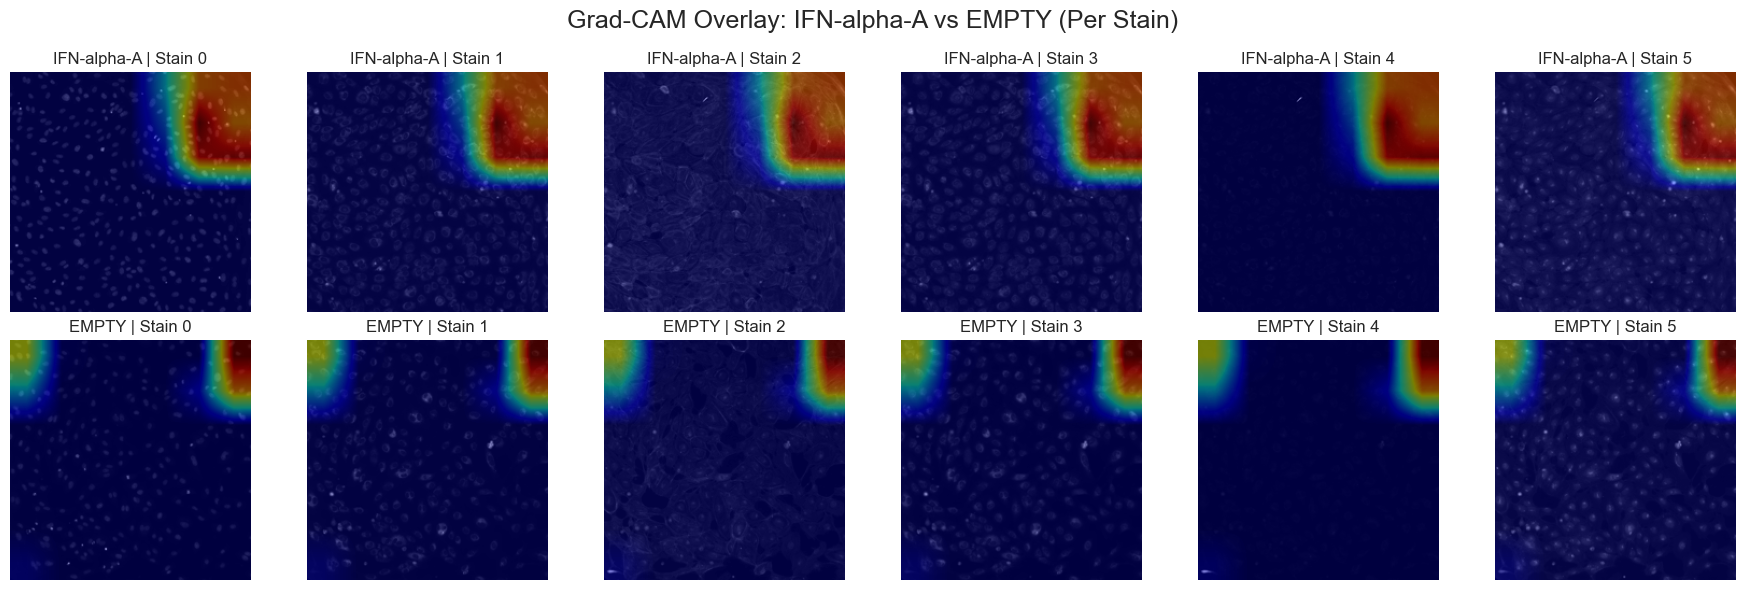

In [53]:
# Pick one example from each class
ifn_path = test_df[test_df["treatment"] == "IFN-alpha-A"].iloc[0]["npy_path"]
empty_path = test_df[test_df["treatment"] == "EMPTY"].iloc[0]["npy_path"]

# Visualize
show_ifn_vs_empty_gradcam(ifn_path, empty_path, classifier_model)
